In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import random
import os

from statsmodels.stats.outliers_influence import variance_inflation_factor

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [2]:
mpl.rc('font', family='Malgun Gothic')

In [3]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
def seed_all(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

In [5]:
seed_all(0)

In [6]:
df.isnull().sum()

ID                0
월                 0
일                 0
측정 시간대            0
섭씨 온도(°⁣C)        0
절대 온도(K)          0
이슬점 온도(°C)        0
상대 습도 (%)         0
대기압(mbar)         0
포화 증기압(mbar)      0
실제 증기압(mbar)      0
증기압 부족량(mbar)     0
수증기 함량 (g/kg)     0
공기 밀도 (g/m**3)    0
풍향 (deg)          0
풍속 (m/s)          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36581 entries, 0 to 36580
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              36581 non-null  object 
 1   월               36581 non-null  int64  
 2   일               36581 non-null  int64  
 3   측정 시간대          36581 non-null  object 
 4   섭씨 온도(°⁣C)      36581 non-null  float64
 5   절대 온도(K)        36581 non-null  float64
 6   이슬점 온도(°C)      36581 non-null  float64
 7   상대 습도 (%)       36581 non-null  float64
 8   대기압(mbar)       36581 non-null  float64
 9   포화 증기압(mbar)    36581 non-null  float64
 10  실제 증기압(mbar)    36581 non-null  float64
 11  증기압 부족량(mbar)   36581 non-null  float64
 12  수증기 함량 (g/kg)   36581 non-null  float64
 13  공기 밀도 (g/m**3)  36581 non-null  float64
 14  풍향 (deg)        36581 non-null  float64
 15  풍속 (m/s)        36581 non-null  float64
dtypes: float64(12), int64(2), object(2)
memory usage: 4.5+ MB


C:\anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8291 (\N{INVISIBLE SEPARATOR}) missing from current font.
  func(*args, **kwargs)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8291 (\N{INVISIBLE SEPARATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


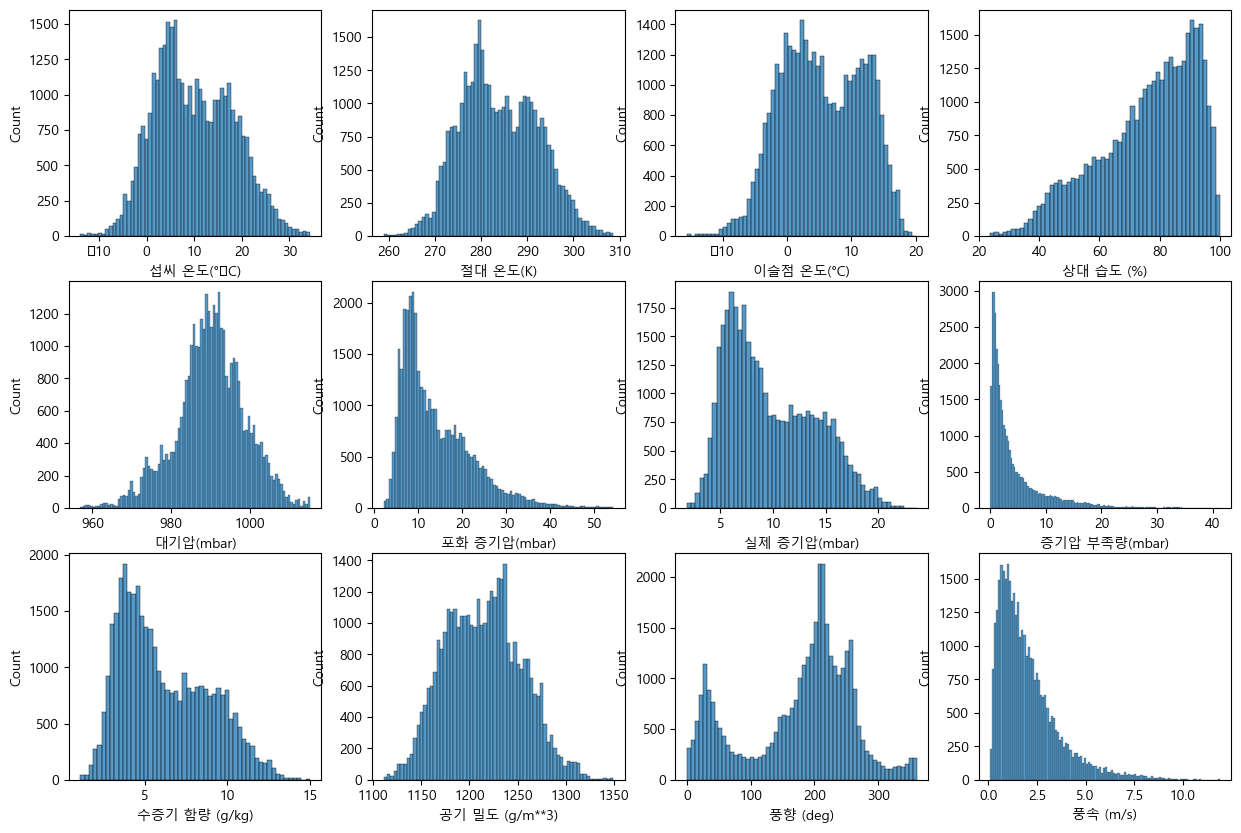

In [8]:
fig, ax = plt.subplots(3, 4)
fig.set_size_inches((15, 10))
dflist = df.columns[4:]
colors = ['black', 'blue', 'red', 'green']
k = 0
for i in range(0, 3):
    for j in range(0, 4):
        sns.histplot(df[dflist[k]], ax=ax[i, j])
        k += 1

C:\anaconda\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8291 (\N{INVISIBLE SEPARATOR}) missing from current font.
  fig.canvas.draw()
C:\anaconda\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: title={'center': 'correlations'}>

C:\anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8291 (\N{INVISIBLE SEPARATOR}) missing from current font.
  func(*args, **kwargs)
C:\anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8291 (\N{INVISIBLE SEPARATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


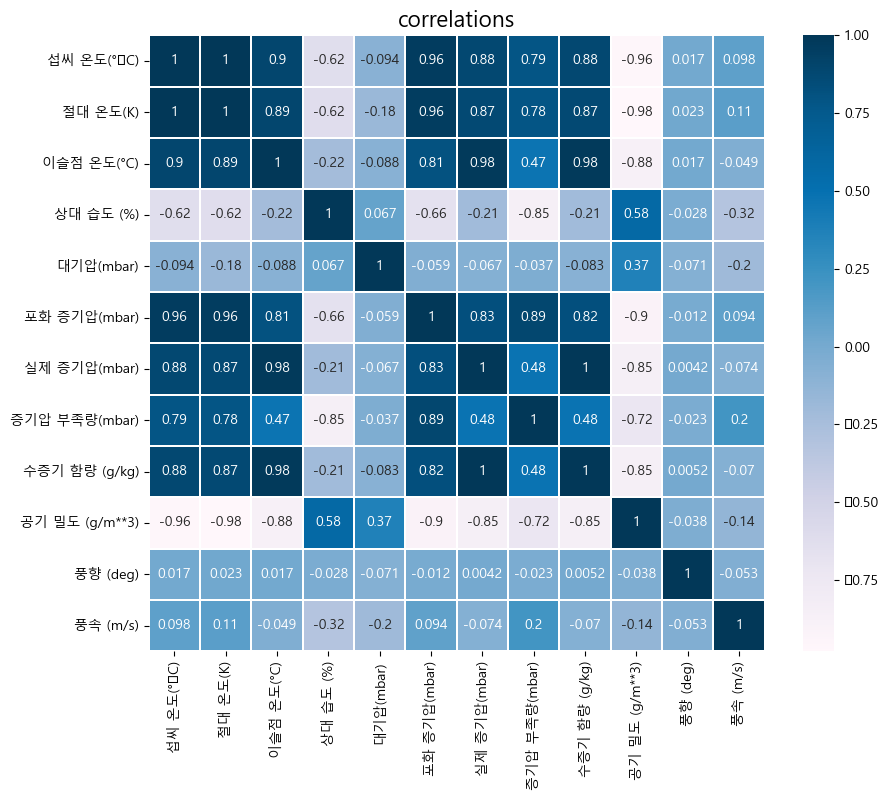

In [9]:
heatmap_data = df[['섭씨 온도(°⁣C)', '절대 온도(K)', '이슬점 온도(°C)', '상대 습도 (%)', '대기압(mbar)',
       '포화 증기압(mbar)', '실제 증기압(mbar)', '증기압 부족량(mbar)', '수증기 함량 (g/kg)',
       '공기 밀도 (g/m**3)', '풍향 (deg)', '풍속 (m/s)']]

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title('correlations', size=16)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [10]:
def feature_engineering_VIF(df):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['feature'] = df.columns
    return vif
vif = feature_engineering_VIF(df[['섭씨 온도(°⁣C)', '절대 온도(K)', '이슬점 온도(°C)', '상대 습도 (%)', '대기압(mbar)',
       '포화 증기압(mbar)', '실제 증기압(mbar)', '증기압 부족량(mbar)', '수증기 함량 (g/kg)',
       '공기 밀도 (g/m**3)', '풍향 (deg)', '풍속 (m/s)']])
print(vif)

             VIF         feature
0   4.674878e+04      섭씨 온도(°⁣C)
1   6.888429e+04        절대 온도(K)
2   9.467937e+02      이슬점 온도(°C)
3   1.702780e+03       상대 습도 (%)
4   2.170520e+07       대기압(mbar)
5   1.043296e+07    포화 증기압(mbar)
6   4.593138e+06    실제 증기압(mbar)
7   1.791804e+06   증기압 부족량(mbar)
8   2.223693e+05   수증기 함량 (g/kg)
9   1.919368e+07  공기 밀도 (g/m**3)
10  5.545674e+00        풍향 (deg)
11  3.355284e+00        풍속 (m/s)


C:\anaconda\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8291 (\N{INVISIBLE SEPARATOR}) missing from current font.
  fig.canvas.draw()
C:\anaconda\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: title={'center': 'correlations'}>

C:\anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8291 (\N{INVISIBLE SEPARATOR}) missing from current font.
  func(*args, **kwargs)
C:\anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8291 (\N{INVISIBLE SEPARATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


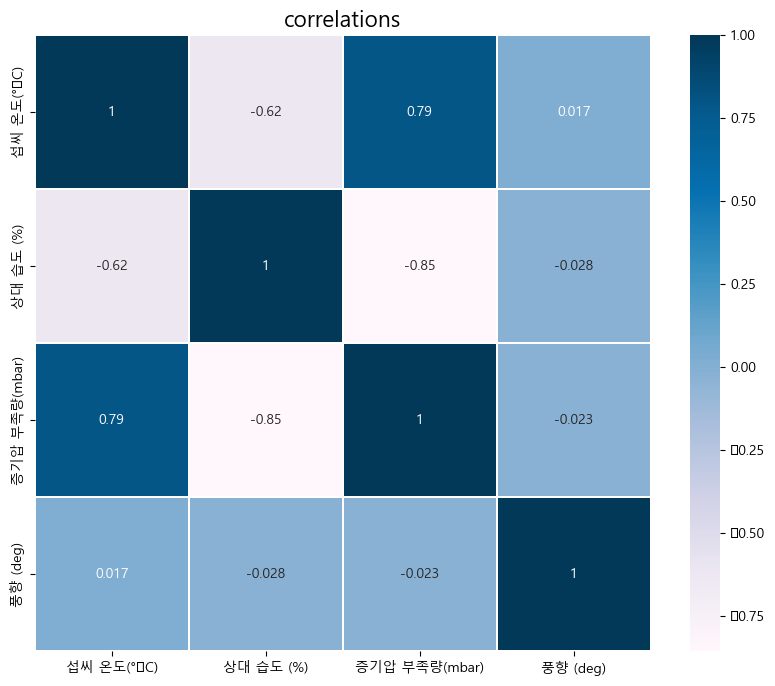

In [11]:
heatmap_data = df[['섭씨 온도(°⁣C)', '상대 습도 (%)', 
       '증기압 부족량(mbar)', 
       '풍향 (deg)']]

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title('correlations', size=16)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [ ]:
df[['섭씨 온도(°⁣C)'], ['이슬점 온도(°C)'], ['상대 습도(%)'], ['대기압(mbar)'], ['포화 증기압(mbar)'], ['증기압 부족량(mbar)'], ['실제 증기압(mbar)'], ['수증기 함량 (g/kg)'], ['공기 밀도 (g/m**3)'], ['풍향 (deg)'],] = StandardScaler().fit_transform(df[['섭씨 온도(°⁣C)'], ['이슬점 온도(°C)'], ['상대 습도(%)'], ['대기압(mbar)'], ['포화 증기압(mbar)'], ['증기압 부족량(mbar)'], ['실제 증기압(mbar)'], ['수증기 함량 (g/kg)'], ['공기 밀도 (g/m**3)'], ['풍향 (deg)'],])
test[['섭씨 온도(°⁣C)'], ['이슬점 온도(°C)'], ['상대 습도(%)'], ['대기압(mbar)'], ['포화 증기압(mbar)'], ['증기압 부족량(mbar)'], ['실제 증기압(mbar)'], ['수증기 함량 (g/kg)'], ['공기 밀도 (g/m**3)'], ['풍향 (deg)'],] = StandardScaler().transform(test[['섭씨 온도(°⁣C)'], ['이슬점 온도(°C)'], ['상대 습도(%)'], ['대기압(mbar)'], ['포화 증기압(mbar)'], ['증기압 부족량(mbar)'], ['실제 증기압(mbar)'], ['수증기 함량 (g/kg)'], ['공기 밀도 (g/m**3)'], ['풍향 (deg)'],])

stdscaler = StandardScaler()
mmscaler = MinMaxScaler()

def scaler(df, trainset=True):
    if trainset==True:
        global temp_std
        temp_std = StandardScaler()
        temp_std = temp_std.fit(df[['섭씨 온도(°⁣C)']])
        df[['섭씨 온도(°⁣C)']] = temp_std.transform(df[['섭씨 온도(°⁣C)']])

        global temp_dew_std
        temp_dew_std = StandardScaler()
        temp_dew_std = temp_dew_std.fit(df[['이슬점 온도(°C)']])
        df[['이슬점 온도(°C)']] = temp_dew_std.transform(df[['이슬점 온도(°C)']])

        global humid_std
        humid_std = StandardScaler()
        humid_std = humid_std.fit(df[['상대 습도 (%)']])
        df[['상대 습도 (%)']] = humid_std.transform(df[['상대 습도 (%)']])

        global airp_std
        airp_std = StandardScaler()
        airp_std =airp_std.fit(df[['대기압(mbar)']]) 
        df[['대기압(mbar)']] = airp_std.transform(df[['대기압(mbar)']])

        global sat_vp_std
        sat_vp_std = StandardScaler()
        sat_vp_std = sat_vp_std.fit(df[['포화 증기압(mbar)']])
        df[['포화 증기압(mbar)']] = sat_vp_std.transform(df[['포화 증기압(mbar)']])

        global rvp_std
        rvp_std= StandardScaler()
        rvp_std = rvp_std.fit(df[['실제 증기압(mbar)']])
        df[['실제 증기압(mbar)']] = rvp_std.transform(df[['실제 증기압(mbar)']])

        global vpn_std
        vpn_std = StandardScaler()
        vpn_std = vpn_std.fit(df[['증기압 부족량(mbar)']])
        df[['증기압 부족량(mbar)']] = vpn_std.transform(df[['증기압 부족량(mbar)']])

        global vap_std
        vap_std = StandardScaler()
        vap_std = vap_std.fit(df[['수증기 함량 (g/kg)']])
        df[['수증기 함량 (g/kg)']] = vap_std.transform(df[['수증기 함량 (g/kg)']])

        global aird_std
        aird_std= StandardScaler()
        aird_std = aird_std.fit(df[['공기 밀도 (g/m**3)']])
        df[['공기 밀도 (g/m**3)']] = aird_std.transform(df[['공기 밀도 (g/m**3)']])

        global wd_mms
        wd_mms = MinMaxScaler()
        wd_mms = wd_mms.fit(df[['풍향 (deg)']])
        df[['풍향 (deg)']] = wd_mms.transform(df[['풍향 (deg)']])
        
        global mt_mms
        mt_mms = MinMaxScaler()
        mt_mms = mt_mms.fit(df[['월']])
        df[['월']] = mt_mms.transform(df[['월']])
        
        global ds_mms
        ds_mms = MinMaxScaler()
        ds_mms = ds_mms.fit(df[['일']])
        df[['일']] = ds_mms.transform(df[['일']])
    
    else:
        df[['섭씨 온도(°⁣C)']] = temp_std.transform(df[['섭씨 온도(°⁣C)']])

        df[['이슬점 온도(°C)']] = temp_dew_std.transform(df[['이슬점 온도(°C)']])

        df[['상대 습도 (%)']] = humid_std.transform(df[['상대 습도 (%)']])

        df[['대기압(mbar)']] = airp_std.transform(df[['대기압(mbar)']])

        df[['포화 증기압(mbar)']] = sat_vp_std.transform(df[['포화 증기압(mbar)']])

        df[['실제 증기압(mbar)']] = rvp_std.transform(df[['실제 증기압(mbar)']])

        df[['증기압 부족량(mbar)']] = vpn_std.transform(df[['증기압 부족량(mbar)']])

        df[['수증기 함량 (g/kg)']] = vap_std.transform(df[['수증기 함량 (g/kg)']])

        df[['공기 밀도 (g/m**3)']] = aird_std.transform(df[['공기 밀도 (g/m**3)']])

        df[['풍향 (deg)']] = wd_mms.transform(df[['풍향 (deg)']])
        
        df[['월']] = mt_mms.transform(df[['월']])
        
        df[['일']] = ds_mms.transform(df[['일']]) 

In [13]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
def encoder(df, trainset=True):
    if '측정 시간대' in df.columns:
        times = pd.DataFrame(ohe.fit_transform(df[['측정 시간대']]))
        times.columns = ['오전', '오후', '저녁']
        df = pd.concat([df, times], axis=1)
        df.drop(columns = '측정 시간대', inplace=True)
    if "ID" in df.columns:
        if trainset==True:
            global trid
            trid = df[['ID']]
            df.drop(columns = 'ID', inplace=True)
        else:
            global teid
            teid = df[['ID']]
            df.drop(columns = 'ID', inplace=True)
            
        
        
    return df

In [14]:
scaler(df)
scaler(test)

df = encoder(df, trainset=False)
test = encoder(test, trainset=False)

In [15]:
df.drop(columns = ['절대 온도(K)'], inplace=True)
test.drop(columns = ['절대 온도(K)'], inplace=True)

df= df[['월', '일', '오전', '오후', '저녁', '섭씨 온도(°⁣C)', '이슬점 온도(°C)', '상대 습도 (%)', '대기압(mbar)', 
        '포화 증기압(mbar)', '실제 증기압(mbar)', '증기압 부족량(mbar)', '수증기 함량 (g/kg)', 
        '공기 밀도 (g/m**3)', '풍향 (deg)', '풍속 (m/s)']]

test = test[['월', '일', '오전', '오후', '저녁', '섭씨 온도(°⁣C)', '이슬점 온도(°C)', '상대 습도 (%)', '대기압(mbar)', 
        '포화 증기압(mbar)', '실제 증기압(mbar)', '증기압 부족량(mbar)', '수증기 함량 (g/kg)', '공기 밀도 (g/m**3)', '풍향 (deg)']]


In [16]:
df.to_csv('df.csv')
test.to_csv('test_.csv')